<a href="https://colab.research.google.com/github/Demilock/OCR/blob/master/google_vision_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import getpass
APIKEY = getpass.getpass()

··········


In [0]:
!pip install --upgrade pip
!pip install --upgrade google-api-python-client

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1)
Requirement already up-to-date: google-api-python-client in /usr/local/lib/python3.6/dist-packages (1.8.2)


In [0]:
from google.colab import files
image = files.upload()

Saving txt_mudit_b8_1_513.jpg to txt_mudit_b8_1_513 (2).jpg


In [0]:
from PIL import Image
from io import BytesIO
im = Image.open(BytesIO(image['txt_mudit_b8_1_513.jpg']))

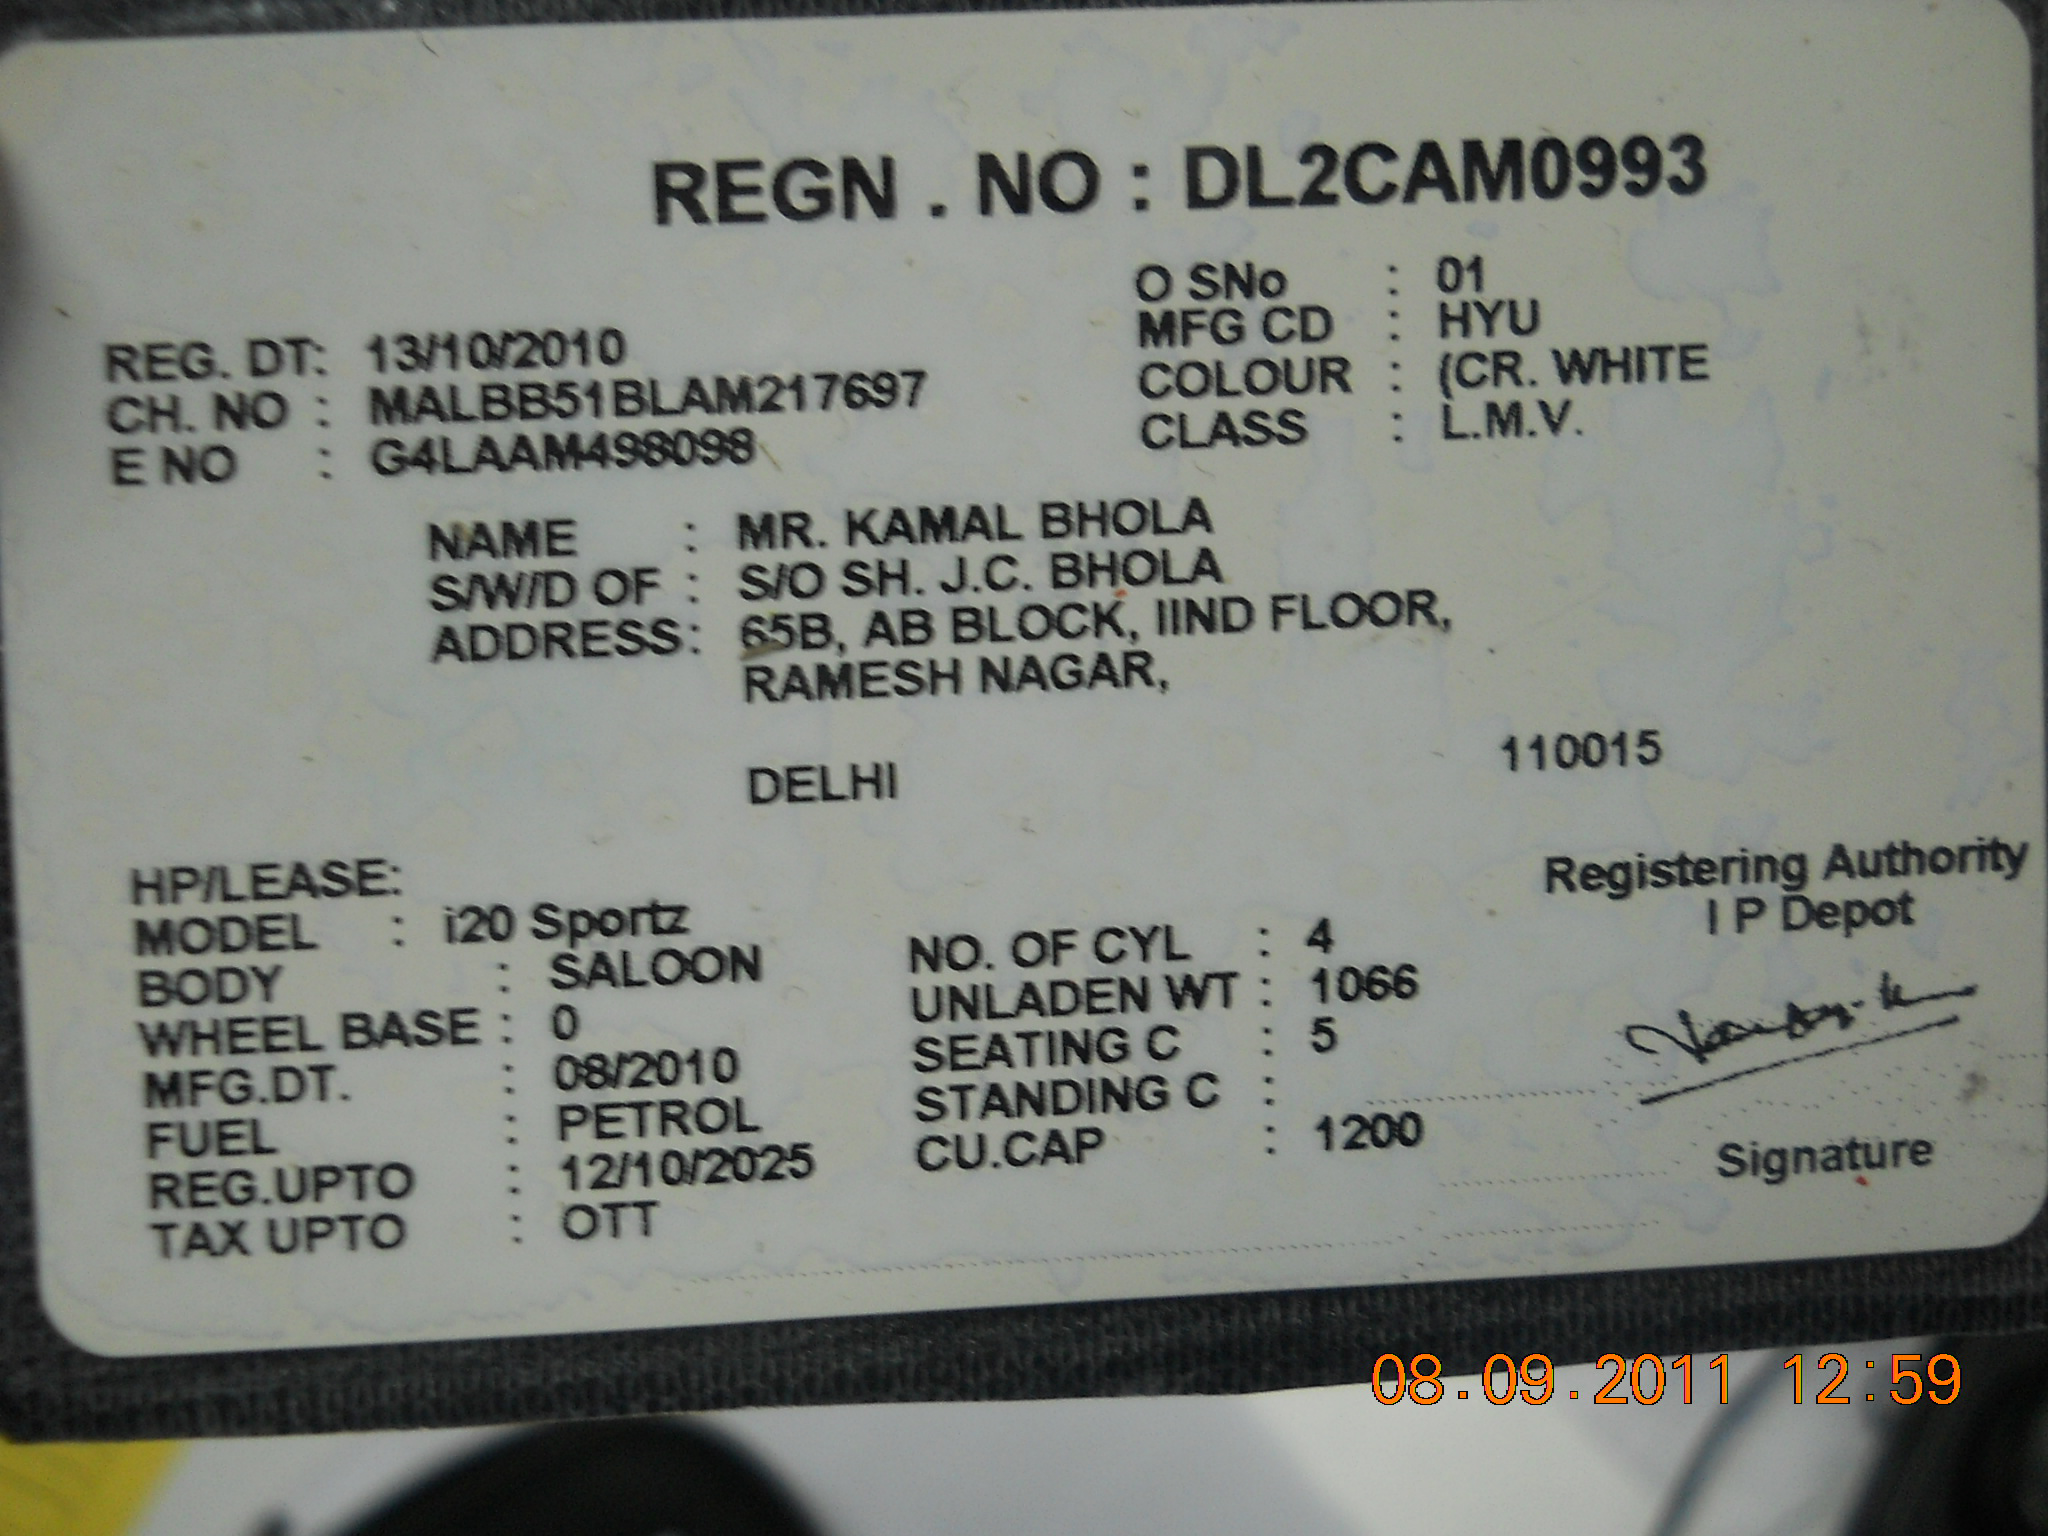

In [0]:
im

In [0]:
import base64
from googleapiclient.discovery import build
IMAGE="https://drive.google.com/file/d/1kH7cbWRfY-YynavQRh5SspdWVbb1vwSD/view?usp=sharing"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })
responses = request.execute(num_retries=3)
print(responses['responses'][0]['textAnnotations'][0]['description'])

HttpError: ignored